In [14]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [1]:
# Distribution graphs (histogram/bar graph) of column data
def plot_per_column_dist(df, n_graph_shown, n_graph_per_row):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    n_rows, n_cols = df.shape
    column_names = list(df)
    n_graph_row = (n_cols + n_graph_per_row - 1) / n_graph_per_row
    plt.figure(num = None, figsize = (6 * n_graph_per_row, 8 * n_graph_row), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(n_cols, n_graph_shown)):
        plt.subplot(n_graph_row, n_graph_per_row, i + 1)
        columns_df = df.iloc[:, i]
        if (not np.issubdtype(type(columns_df.iloc[0]), np.number)):
            valueCounts = columns_df.value_counts()
            valueCounts.plot.bar()
        else:
            columns_df.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{column_names[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [2]:
# Correlation matrix
def plot_corr_mat(df, graph_width):
    file_name = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graph_width, graph_width), dpi=80, facecolor='w', edgecolor='k')
    corr_matrix = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corr_matrix)
    plt.title(f'Correlation Matrix for {file_name}', fontsize=15)
    plt.show()

In [3]:
# Scatter and density plots
def plot_scatter_mat(df, plot_size, text_size):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    ## dropping null values
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    column_names = list(df)
    if len(column_names) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        column_names = column_names[:10]
    df = df[column_names]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plot_size, plot_size], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=text_size)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [10]:
''' reading dataset '''
df = pd.read_csv('economic_freedom_index2019_data.csv')
df.dataFrameName = 'economic_freedom_index2019_data.csv'

In [9]:
'''head of data'''
df.head()

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1,Afghanistan,Afghanistan,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,91.7,80.3,99.3,49.2,60.4,76.7,66.0,10.0,10.0,7.0,20.0,20.0,5.0,25.6,Afghanistan,35.5,$69.6,2.5,2.9,"$1,958",8.8,5.0,53.9,7.3
1,2,Albania,Albania,Europe,52.0,27.0,66.5,54.8,30.6,40.4,86.3,73.9,80.6,69.3,52.7,81.5,87.8,70.0,70.0,1.1,23.0,15.0,24.9,29.5,Albania,2.9,$36.0,3.9,2.5,"$12,507",13.9,2.0,"1,119.1",71.2
2,3,Algeria,Algeria,Middle East and North Africa,171.0,14.0,46.2,31.6,36.2,28.9,76.4,48.7,18.7,61.6,49.9,74.9,67.4,30.0,30.0,8.8,35.0,23.0,24.5,41.4,Algeria,41.5,$632.9,2.0,3.1,"$15,237",10.0,5.6,"1,203.0",25.8
3,4,Angola,Angola,Sub-Saharan Africa,156.0,33.0,50.6,35.9,26.6,20.5,83.9,80.7,58.2,55.7,58.8,55.4,61.2,30.0,40.0,9.4,17.0,30.0,20.6,25.3,Angola,28.2,$190.3,0.7,2.9,"$6,753",8.2,31.7,"-2,254.5",65.3
4,5,Argentina,Argentina,Americas,148.0,26.0,52.2,47.8,44.5,33.5,69.3,49.5,33.0,56.4,46.9,60.2,70.0,55.0,60.0,7.5,35.0,30.0,30.8,41.0,Argentina,44.1,$920.2,2.9,0.7,"$20,876",8.7,25.7,"11,857.0",52.6


In [11]:
''' shape of data '''
df.shape

(186, 34)

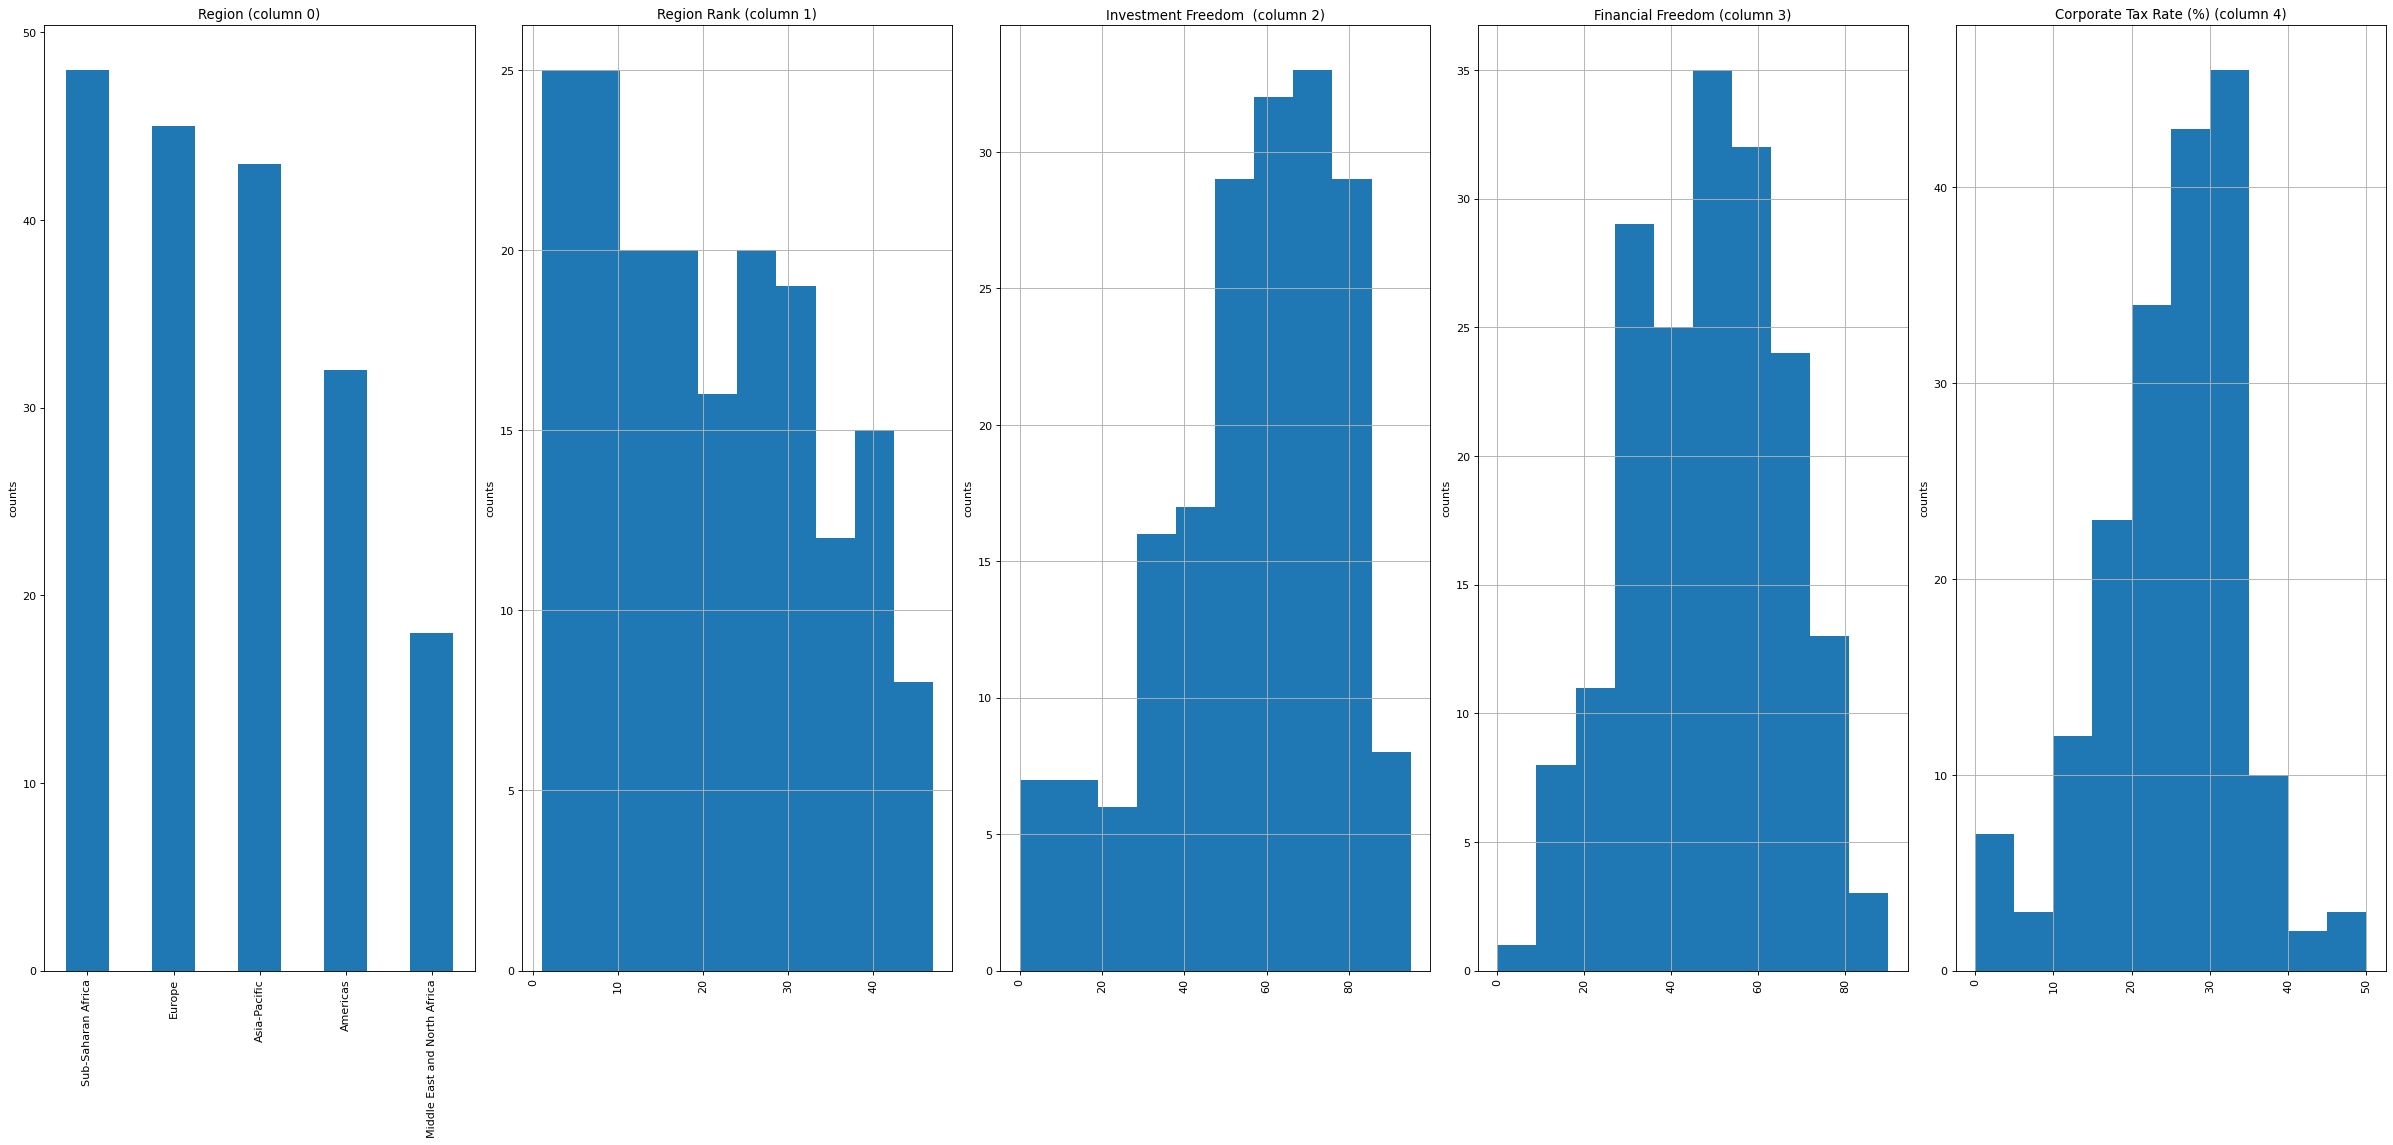

In [15]:
plot_per_column_dist(df, 10, 5)